* Auteurs: Seydou DIA & Simona MILADINOVA


# Introduction

Ce notebook présente les travaux mnés dans le cadre du cours de finance durable au sein du Mastère en Optimisation des Systèmes Energétiques.
L'objectif de ce projet est d'étudier plusieurs stratégies d'optimisation d'un portefeuille d'actifs issus du S&P500.
En plus d'implémenter des différents modèles d'optimisation, l'objectif de ce projet sera également de calculer différents indicateurs utilisés dans le secteur d'asset management.
Au-delà de mettre en place des stratégies d'optimisation et d'anlayser leurs différentes metrics, le but de ce travail est également d'intégrer des contraintes/ des pénalités d'empreinte carbone associé à chacun de nos actifs pour analyser l'impact qu'elles ont sur le rendement, le risque ainsi que d'autres métrics permettant d'anlayser la performance des portefeuilles. 

Ce notebook est divisé en 6 parties si nous excluons l'introduction ci-dessus. 
La première traite de la sélection des actifs qui seront intégrés dans les différents portefeuilles étudiés
La seconde partie de se notebook présente les différents modèles d'optimisation et les choix d'implémentation retenus pour le projet. 
Dans la troisième partie une analyse des indicateurs permettant de quantifier la performance des portefeuilles sera mené. 
Dans un quatrième temps nous relancerons de nouvelles optimisation mais cette fois-ci en intégrant des pénalités d'empreintes carbone.
Nous conduirons dans la cinquième partie une nouvelle analyse comparable à celle conduite dans la partie 3 pour comprendre l'impact des pénalités carbone sur les performances du portefeuilles.
Nous finirons ensuite par conclure notre étude en menant une réflexion sur l'ensemble du travail qui a été mené.



Nous tenons à informer le lecteur que le modèle MAXDIV et MSR ont été approximés suite à un travail de recherche bibliographique.


# Sélection des actifs

## Le jeu de données

Le jeu de données dont nous disposons contient les actifs S&P500

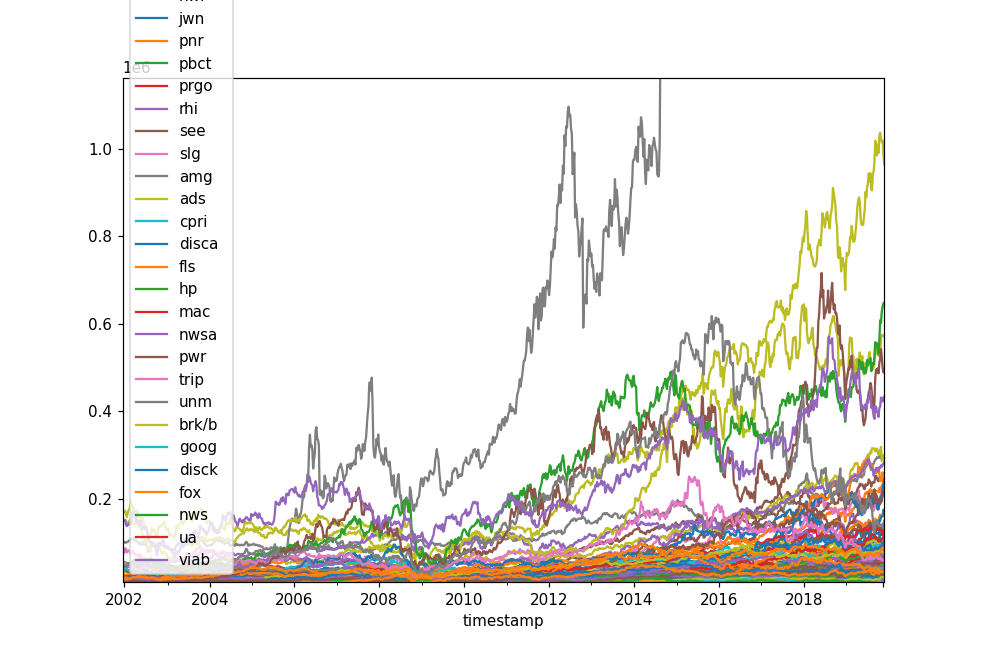

Dans la mesure où tous les actifs ne sont pas disponibles depuis le début du dataset, nous avons procédé à un choix de début d'année d'analyse avant de conduire toute analyse et sélection. 

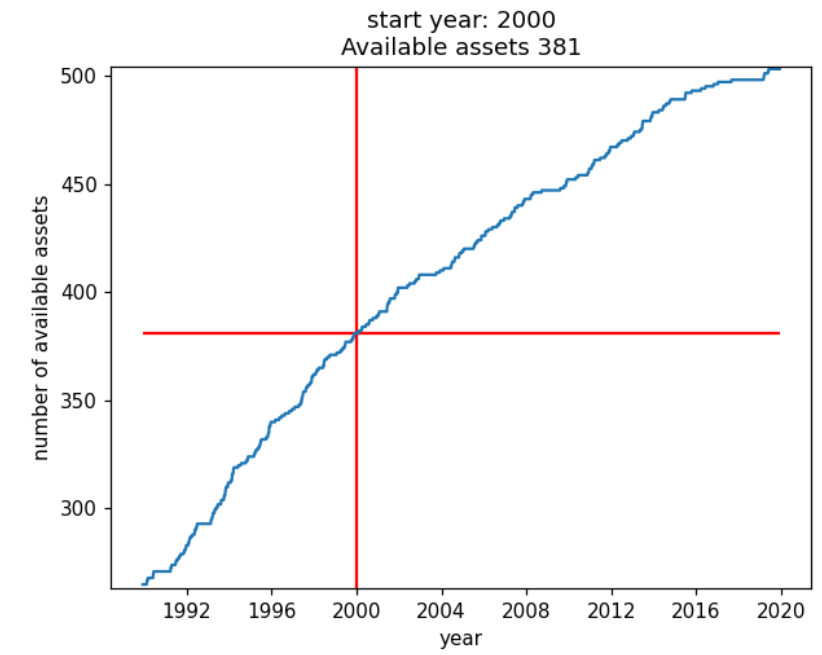

Voici ci-dessous un graphique représentant les assets disponibles dans notre dataset initial en fonction de l'année. Nous avons décidé de choisir l'année 2000 comme début de l'analyse. Nous remarquons que nous avons 381 actifs existants lors de cette année. 

A la suite de cette présélection, nous avons chosi 50 actifs issus des 10 secteurs du S&P500. Nous avons donc choisi pour chacun des 10 secteurs les 5 actifs avec la carbon footprint la plus faible.

C'est sur la base de ces 50 actifs que nous appliquerons nos programmes d'optimisation et l'analyse.

# Présentation des modèles d'optimisation

Nous proposons ici de présenter les modèles d'optimisations suivants qui ont été appliqués aux 50 actifs sélectionnés au préalable : 

- **Equally Weighted**
- **Global Minimum Variance**
- **Max Decorrelation**
- **Max diversification**
- **Maximum Sharpe Ratio**


L'ensemble des fonctions sont présentées dans le cours de l'EDHEC du MS OSE présenté par M. MARTINELLI. 
Concernant les portefeuilles Max Diversification et Maximum Sharpe Ratio, nous avons avons remodélisé le problème, de manière à ce que notre solveur puisse trouver une solution. En effet ces portefeuilles impliquait la division de deux variables de décisions qui n'est pas pris en compte dans la version actuelle de Gurobi. 
La modélisation est présente dans le notebook asset_optimization dans le répertoire git du projet.

De plus, en raison du solver utilisé tout au long du projet, Gurobi, le portefeuille ERC n'a pas été modélisé. En effet, le travaille de remodélisation ou de linéarisation permettant à nos algorithmes de converger necessitait un temps trop considérable que n'étions pas en mesure d'alloué.



L'ensemble des codes d'optimisations peuvent être trouvés sur notre répertoire GIT dédié au projet [LIEN](https://github.com/seydoudia/portfolio_optimization).


Pour chacun de nos portefeuilles, nous calculons les données d'entrées de nos problèmes d'optimisation sur un historique de 2 ans, rendement et écart-type, ainsi que les autres indicateurs dérivés de ces deux derniers (comme la corrélation par exemple). 

Les poids sont ensuite appliqués aux actifs sur les 3 mois suivant la période d'entraînement, au pas de temps 1 semaine, pour calculer les rendements et écart-types de chacun de nos portefeuilles.


La fenêtre est ensuite décaler de 3 mois afin que nous répétions les deux étapes mentionnés ci-dessus. Ce processus est réalisé sur 20 ans, entre 2000 et 2020. 



# Etude des résultats

Une fois nos portefeuilles optimisés, nous proposons d'analyser différents indicateurs pour comprendre leurs comportements. Parmi-eux nous trouvons : 

- le rendement
- l'écart-Type
- la tracking Error
- l'excess Return 
- l'EnC
- l'Information Ratio
- Sharpe Ratio

Nous proposons d'analyser chacun d'eux ci dessous : 

## Rendement

### Distribution des rendements hebdomadaires

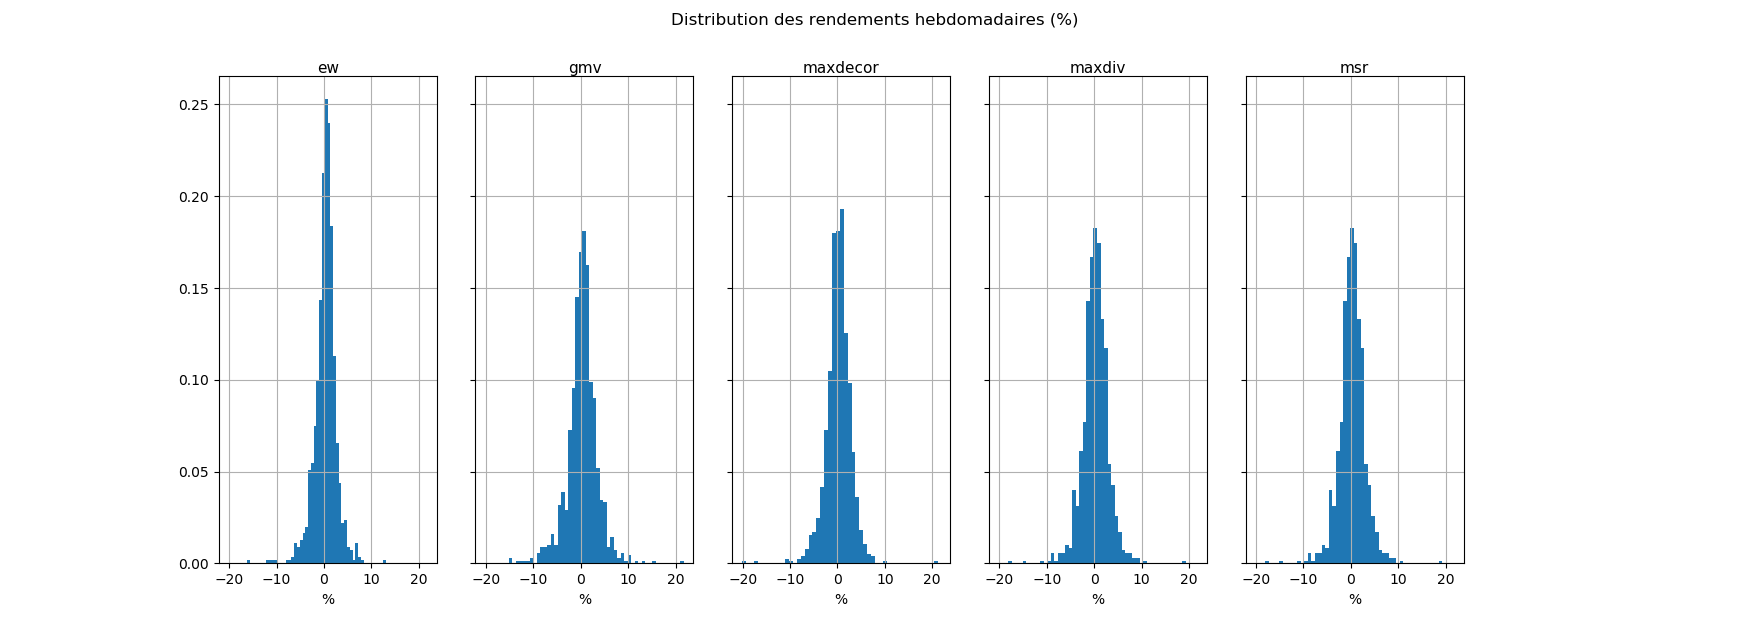

En regardant la distribution des rendements hebdomadaires, elles semblent suivre une loi normale centrée autour de zéro pour chacun des portefeuilles  On observe des outliers des deux côtés de la distributions avec des rendements absolus maximaux d'une semaine à l'autre atteignant -20% et +20%.

### Rendement moyen sur les 20 ans annualisé

Le premier indicateur qui découle des distributions que nous avons décidé d'analyser est le rendement moyen sur les 20 ans  annualisé. On remarque que le portefeuille qui présente le meilleur rendement est le GMV suivi de très près par l'EW avec respectivement 15.8 et 15.4 %. A l'opposé, nous avons le portefeuille MAXDECOR qui présente les performances les plus faibles, 10%. Concernant les portefeuilles MAXDIV et MSR, ils sont à égalité avec un rendement s'élevant à 12.3 %.

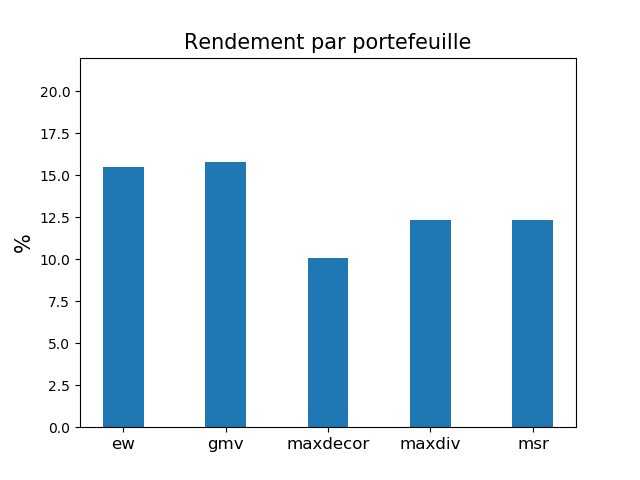

## Ecart-Type du rendement

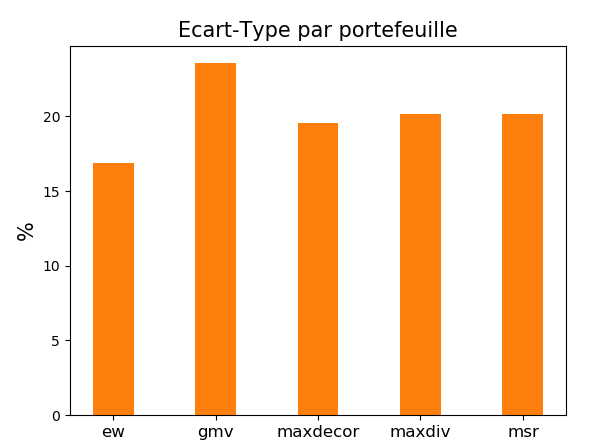

Nous proposons ici de regarder l'écart-type du rendement. Il ne faut surtout pas confondre cette indicateur avec le risque du portefeuille dont la formule comprend la corrélation entre les différents titres. Ici nous nous intéressons à la volatilité du rendement de chacun de nos portefeuilles. On peut remarquer que c'est le portefeuille GMV qui induit une plus grande volatilité dans ses valeurs de rendements. 
Contrairement à ce que l'on pouvait observer dans le graphique précédent, l'EW a quant à lui une volatilité faible par rapport aux autres portefeuilles. On retrouve ici une nouvelle fois une certaine correspondance entre les valeurs du MAXDIV et du MSR.

## Weekly Tracking Error

La tracking error permet de mesurer de la qualité de nos portefeuilles en comparant l'écart-type des différences de rendements avec un benchmark. Dans notre cas, le benchmark choisi correspond au portefeuille EW du S&P500.
Grâce à cette indicateur on peut avoir quels sont les portefeuilles ayant un rendement moyen proche ou éloigné du benchmark. Elle permet d'obtenir une zone de sous-performance/surperformance possible du portefeuille par rapport à son indice de référence. 
Cela étant dit, plus la tracking error est élevée, plus le porteufeuille a une performance moyenne éloignée de son indice de référence. A l'inverse, une tracking error faible montre que le portefeuille a une performance qui oscille autour de celle de l'indice de référence. 



 
Mathématiquement la formule utilisée pour calculer la tracking error sur une période donnée avec des rendements enregistrés au niveau hebdomadaire est la suivante: 

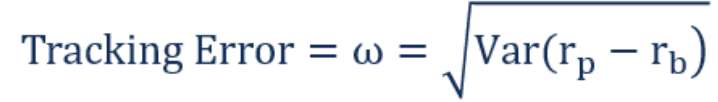

Où $r_{p}$ représente le rendement du portefeuille étudié et $r_{b}$ signifie le rendement du portefeuille benchmark choisi. Nous tenons à informer le lecteur que nous avons annualisé chacune de nos tracking errors dans les résultats présentés ci-dessous.

Dans un premier temps nous nous proposons d'observer la distribution de la tracking error calculée trismestriellement après chaque période de test.

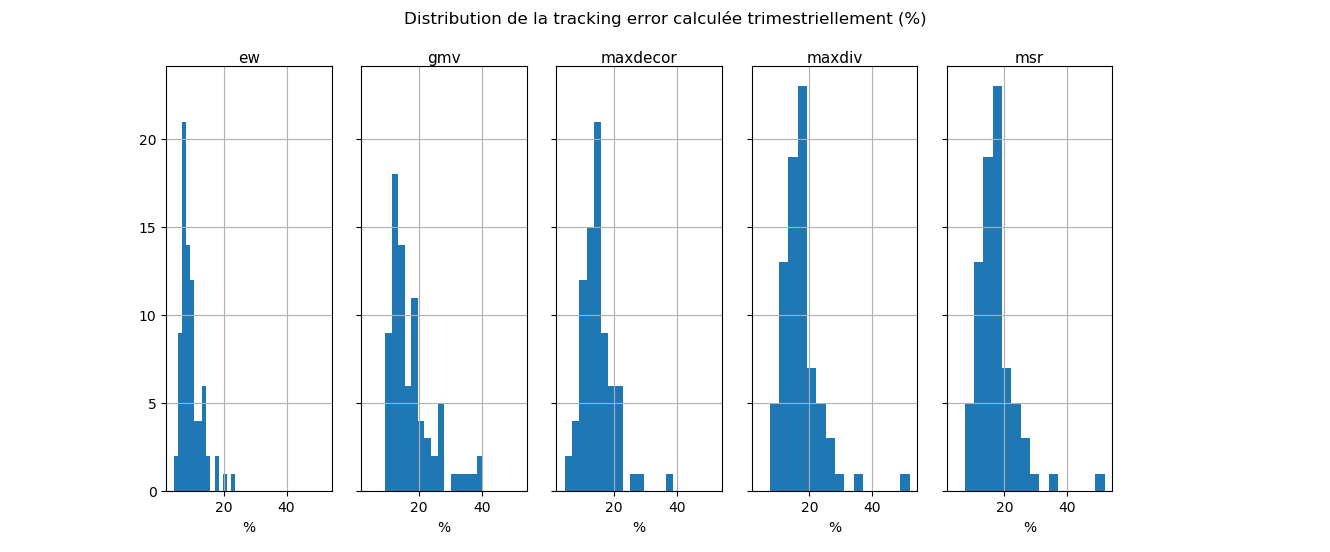

Il semblerait que les distributions soient décalées vers la gauche et non distribuées normalement. On relève également que le portefeuille EW montre une moyenne de 17.3%. Pour les portefeuilles MAXDECOR, MAXDIV et MSR, nous observons des distributions similaires avec une valeur maximale pour ces deux derniers aux environs de 50%. 

On notera que l'EW à des performances proches de celles du benchmark dans la mesure où la tracking error est calculée à partir de l'EW du S&P500.

### Yearly Tracking Error

Dans un deuxième temps on se concentre sur la tracking error sur la base d'une année complète entre 2000 et 2020. Nous retrouvons des résultats cohérents avec la distribution. Une nouvelle fois l'EW possède la tracking error la plus faible vis-à-vis de notre benchmark.


On remarquera qu'il existe une forte corrélation entre les 4 autres portefeuilles. Il à noter que les portefeuilles MAXDIV et MSR sont superposés ce qui explique pourquoi la courbe rouge n'est pas visbile sur le graphique.

Il est également intéressant de relever la valeur obtenu en 2007-2008 avec un tracking error démontrant un pic pour chacun de nos portefeuilles. En effet, cela correspond à la crise financière qui a bousculé les marchés boursiers américains mais aussi mondiaux. On voit donc ici la limite d'optimiser nos poids sur des données historiques vis-à-vis d'une forte et soudaine fluctuation de marché.

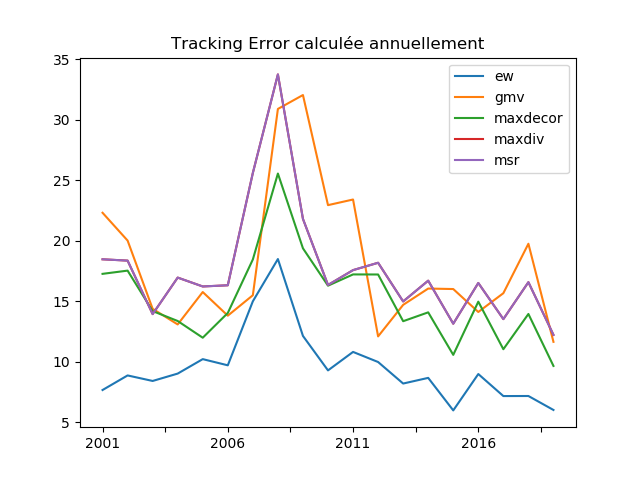

## Excess Return 

Cet indicateur représente de combien le portefeuille surperforme ou sous-performe notre benchmark EW du S&P500. Dans la littérature cette indicateur est corrigé du risque et nous avons ici seulement calculé la différence pour simplifier l'étude.

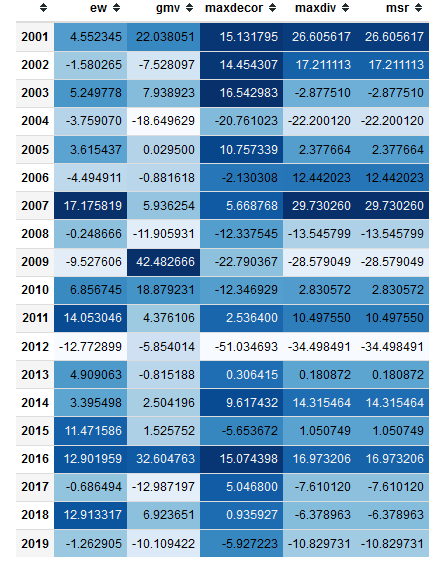

La table ci-dessus est colorée en fonction de la valeur de chacune des cellules. Plus une cellule est colorée en bleu foncé, et plus la valeur est importante.

On remarque une cohérence entre cet indicateur et la tracking error. En effet, les années où cette dernière était élevée correspond à des valeurs absolues élevées d'excess return. On relève une nouvelle fois les année  2008 mais aussi 2007 où chacun des portefeuilles ont superformé le benchmark. Au contraire, l'année 2012 a été une année où chacun de nos portefeuilles ont sous-performer le benchmark avec des valeurs allant jusqu'à -51% pour le MAXDECOR. 

## EnC

L'ENC est un indicateur de concentration des poids dans un actif. Plus sa valeur est élevée, plus notre portefeuille est concentré dans un nombre d'actifs réduit et donc diversifié.

Suivant cette définition, nous pouvons analyser le graphique ci-dessous. La courbe de l'EW n'a pas été tracée car elle est constante à une valeur de 50 tout au long de la période de simulation. Cette valeur correspond à l'ENC maximum possible dans la mesure où nous disposons de 50 actifs. Dans le cas général, si nous avons N actifs, la valeur maximum de l'ENC est égale à N. 


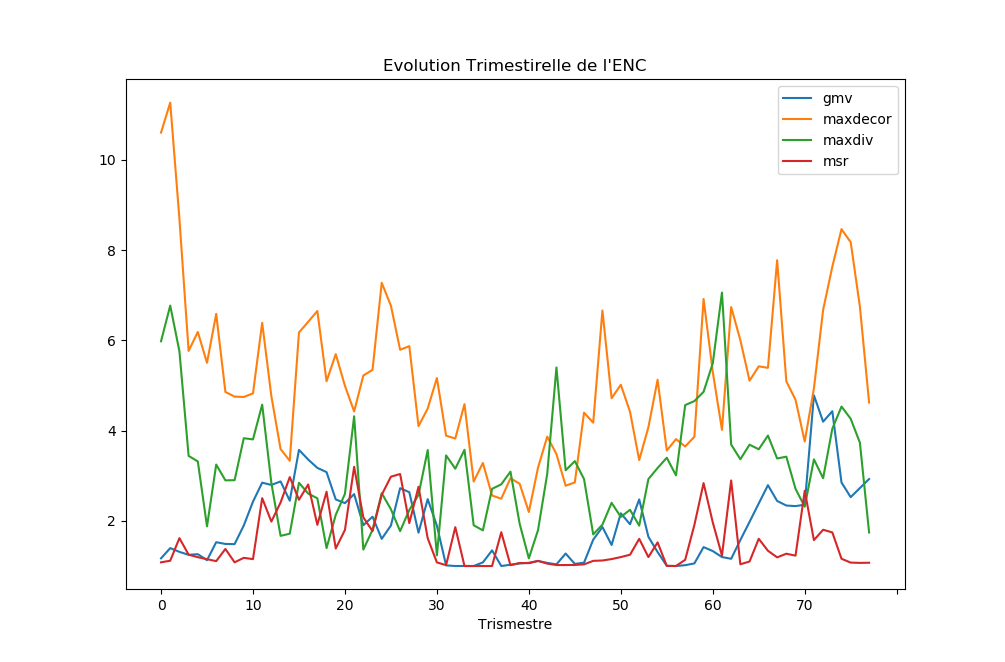

On voit ici que le portefeuille le plus concentré tout au long de la période de simulation est le MSR qui ne dépasse pas la valeur de 3. Au contraire nous retrouvons le MAXDECOR qui dispose de valeurs élevées par rapport aux autres mais demeure loin de la valeur maximale de 50. 

## Graphique de complément

Pour appuyer la visualisation de l'ENC, nous proposons d'observer l'évolution des poids trimestriellement pour les quatre portefeuilles optimisés. Pour des raisons évidentes, l'EW n'est pas représenté. En rouge nous avons représenté les 3 poids avec le plus d'importance et en gris les 47 autres.

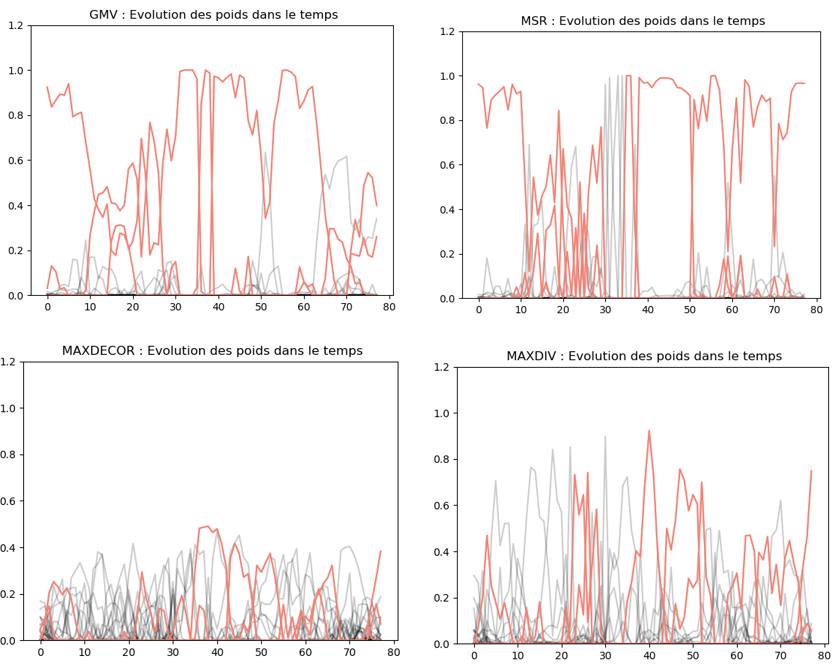

## Information Ratio

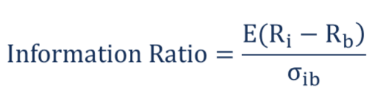

Cet indicateur montre dans quel mesure un portefeuille peut générer de l'excess return de manière pérenne. Il est calculé ci-dessous pour chaque année ainsi que sur l'intégralité de nos données de simulation.
Cette indicateur est un bon indicateur de performance pour les assets managers. En effet il permet de mettre en évidence des stratégies d'investissments apte à maintenir des performances  élevées dans le temps tout en mesurant sa robustesse à des fluctuations de marchés brutales.

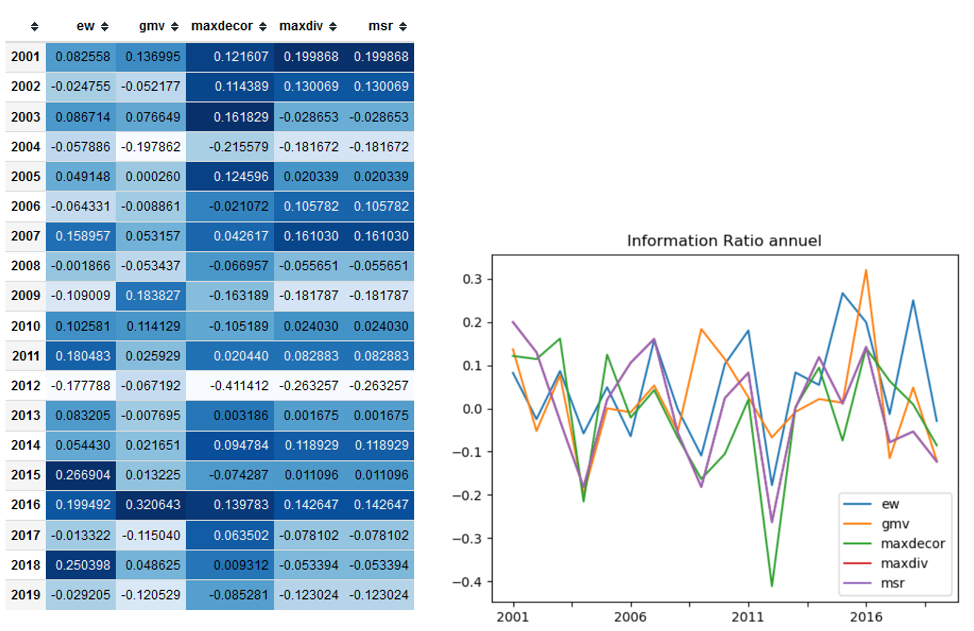

On remarque que l'EW a un meilleur Information Ration la plupart du temps ce qui est encore à metre en relation avec notre benchmark qui nous le rappelons, un EW du S&P500.

## Sharpe Ratio

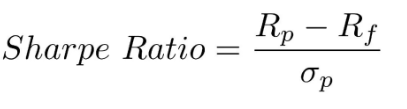

Le Sharp Ratio est utilisé pour étudier les perfrormances d'un actif ou d'un portefeuille. Il représente la différence entre le rendement du portefeuille et le taux sans risque, corrigé de l'écart-type du portefeuille. Il à noter que cet indicateur est très dépendant du taux sans risque utilisé. Dans notre cas nous avons utilisé un taux de 5% qui est basé sur les valeurs historiques moyennes des bons du trésor américain à 10 ans de 2000 à 2020.

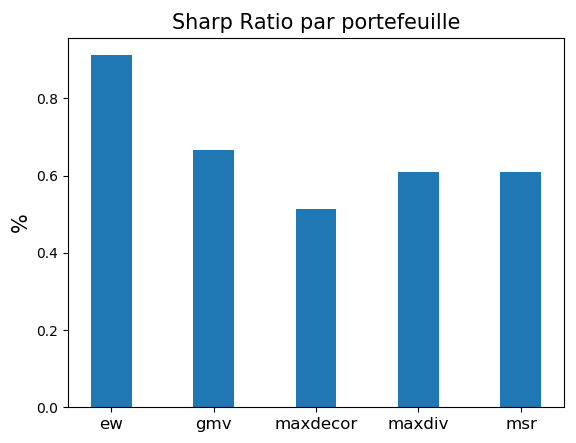

On notera une nouvelle fois que c'est l'EW qui a le meilleur ratio tandis que le MSR se classe en 3ème possition. 
Cela est probablement dû au fait que nous entraînons nos modèles sur des données qui sont estimées (écart-type, rendement).
Ces paramètres, bien qu'ils soient supposés être représentatifs des vrais moyennes et écarts-type, restent des estimations qui sont sensibles au bruit et ne garantissent pas des résultats fiables.


# Intégration des contraintes d'empreintes carbones

Nous proposons dans cette partie de pénaliser l'empreinte carbone dans l'objectif de chacun de nos portefeuilles étudiés dans la partie précédente. Des termes de pénalisation sont ajoutés en multipliant chacun des poids par l'empreinte carbone de l'actif correspondant. Nous proposons ici d'anlayser les indicateurs suivants:
- Rendement du portefeuille
- EnC
- La volatilité du rendement
- L'Excess Return
- La Tracking Error
- L'Information Ratio
- Le Sharpe Ratio


## GMV

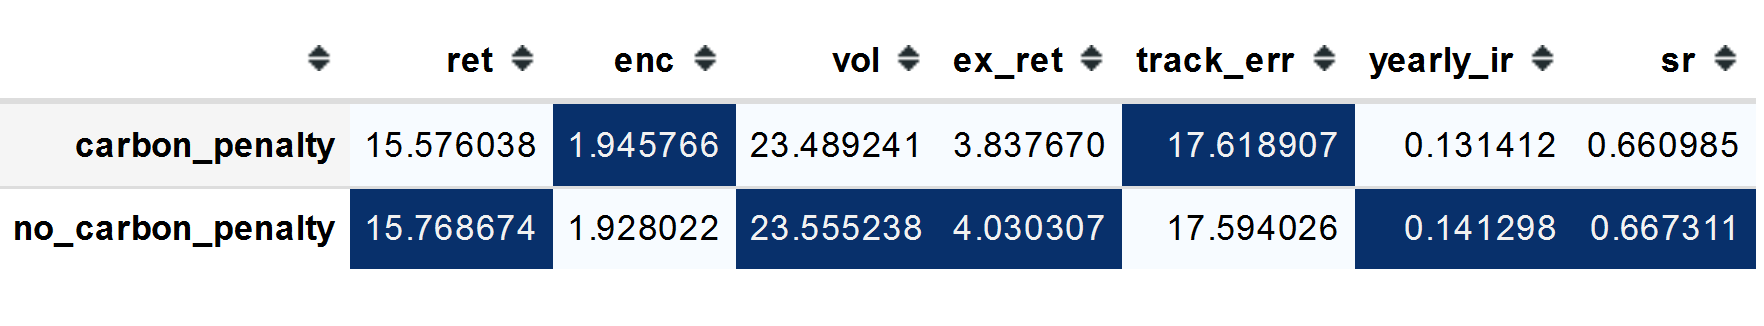

## MAXDECOR

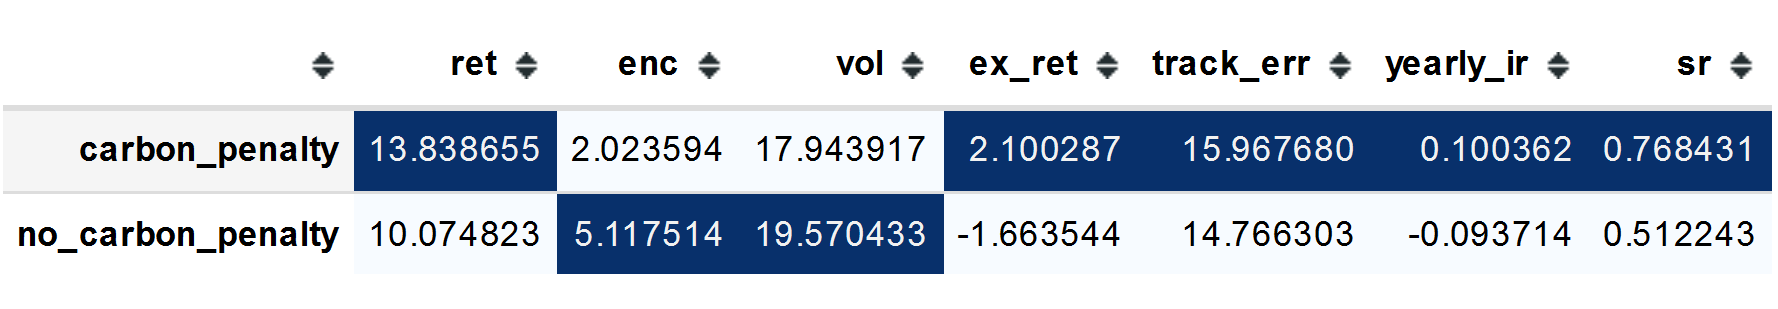

## MAXDIV

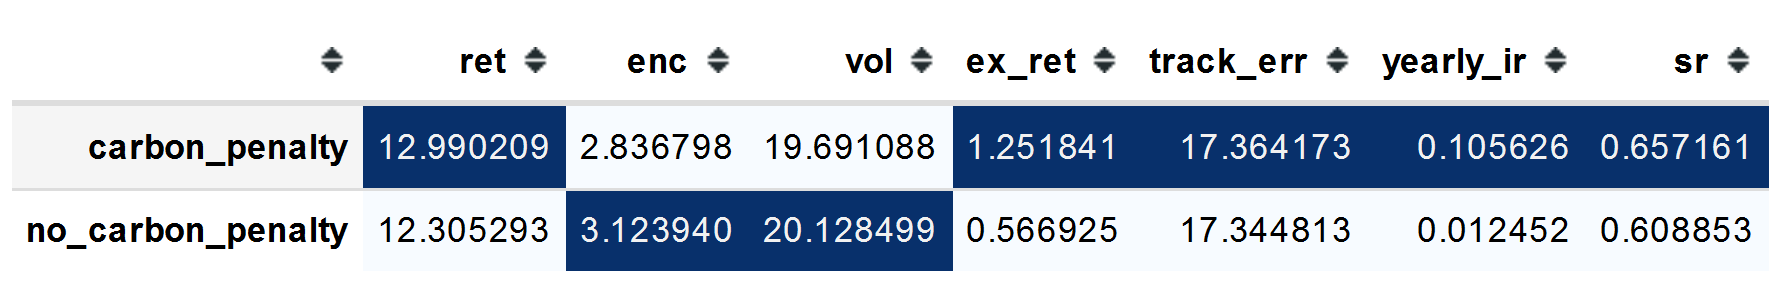

## MSR

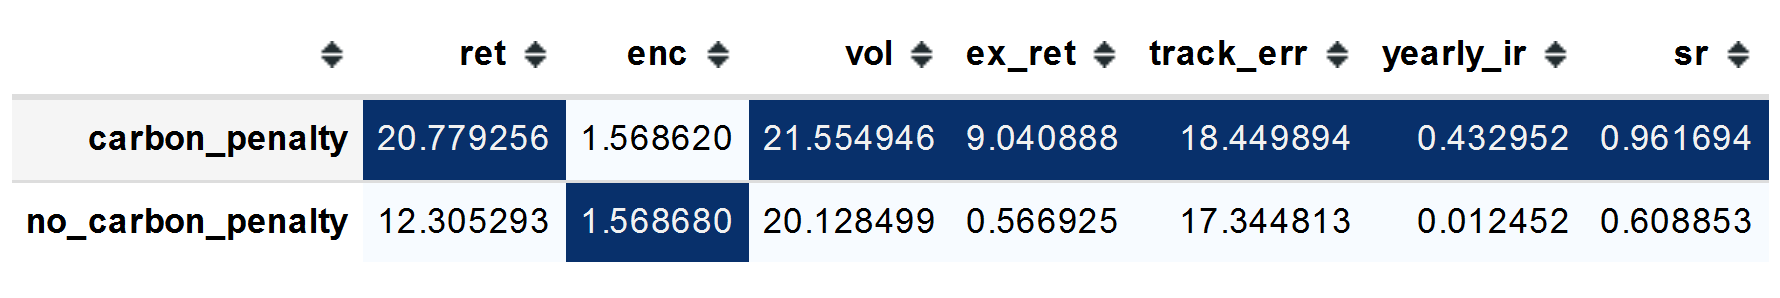

Chaque cellule en blue représente la valeur la plus élevées des deux configuration : avec pénalité carbone et sans pénalité carbone.

Il est très intéressant de noter que sur les 4 portefeuilles, 3 d'entre eux présentent un meilleur rendement lorque nous incluons des pénalités d'empreintes carbone : MAXDIV, MAXDECOR et MSR. 

De plus on remarquera, que pour chacun des trois portefeuilles, l'information ratio ainsi que le sharpe ratio est plus élevé 
avec le modèle de pénalités carbone.

Cependant, on remarquera que l'EnC est systématiquement plus faible ce qui implique une concentration d'actif plus importante. 


Nous pouvons penser que ce résultat s'explique par la corrélation qui existe entre les valeurs boursières et le cours du pétrole. En effet sur notre période de simulation, nous avons eu la crise financière ainsi que la crise du pétrole de 2015-2016. Les entreprises émittrices ont une activité qui dépend fortement du cours des énergies fossiles.

Nos modèles d'optimisations ont donc probablement concentré les poids  dans les actifs les moins carbonés qui pourraient être beaucoup moins affectés par ces fluctuations de marchés.

Ces résultats sont à considérer avec modération dans la mesure où nos modèles sont sensibles au bruit.

**FIN DU NOTEBOOK**